In [1]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import cartopy.crs as crs
from cartopy.feature import NaturalEarthFeature
from wrf import (to_np, getvar, smooth2d, get_cartopy, cartopy_xlim,
                 cartopy_ylim, latlon_coords, ALL_TIMES,interpline, CoordPair, xy_to_ll, ll_to_xy)
import pandas as pd
import numpy as np
import os
import shutil
import re
import netCDF4 as nc
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeat
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.mpl.ticker import LongitudeFormatter,LatitudeFormatter
import matplotlib.ticker as mticker
import cartopy.crs as ccrs                                               
import cartopy.feature as cf
import matplotlib.pyplot as plt
import glob
from scipy.stats import norm
from scipy import stats
import seaborn as sns
import shapefile
import geopandas as gpd
from matplotlib.backends.backend_pdf import PdfPages
from mpl_toolkits.axes_grid1 import make_axes_locatable

# information

In [2]:
ds_lu_2040s = xr.open_dataset('wrfout_d04_2040-06-18_23:00:00')
lu_2040s = ds_lu_2040s['LU_INDEX']

lu_2040s = lu_2040s[0,:,:]

# csv to xarray

# ssp126

2040s

In [3]:
ssp126_2040s = pd.read_csv('ssp126_t2_4049_ry_land.csv')

ssp126_2040s = ssp126_2040s.replace(9999,np.nan)

In [4]:
ssp126_2040s.sort_values(['south_north','west_east'],ascending=[True,True],inplace=True)

ssp126_2040s_values = ssp126_2040s.reoccur_year.values 
ssp126_2040s_values = ssp126_2040s_values.reshape(162,213)

XLAT = lu_2040s.XLAT
XLONG = lu_2040s.XLONG
south_north = lu_2040s.south_north
west_east = lu_2040s.west_east

In [5]:
ssp126_2040s_xr = xr.DataArray(ssp126_2040s_values,
                                       dims=["south_north","west_east"],
                                       coords=dict(
                                       XLONG=(["south_north", "west_east"], XLONG),
                                       XLAT=(["south_north", "west_east"], XLAT)))

ds_ssp126_2040s = xr.Dataset({'ssp126_2040s_ry': ssp126_2040s_xr})

2090s

In [6]:
ssp126_2090s = pd.read_csv('ssp126_t2_9099_ry_land.csv')

ssp126_2090s = ssp126_2090s.replace(9999,np.nan)

In [7]:
ssp126_2090s.sort_values(['south_north','west_east'],ascending=[True,True],inplace=True)

ssp126_2090s_values = ssp126_2090s.reoccur_year.values 
ssp126_2090s_values = ssp126_2090s_values.reshape(162,213)

XLAT = lu_2040s.XLAT
XLONG = lu_2040s.XLONG
south_north = lu_2040s.south_north
west_east = lu_2040s.west_east

In [8]:
ssp126_2090s_xr = xr.DataArray(ssp126_2090s_values,
                                       dims=["south_north","west_east"],
                                       coords=dict(
                                       XLONG=(["south_north", "west_east"], XLONG),
                                       XLAT=(["south_north", "west_east"], XLAT)))

ds_ssp126_2090s = xr.Dataset({'ssp126_2090s_ry': ssp126_2090s_xr})

# SSP245

2040s

In [9]:
ssp245_2040s = pd.read_csv('ssp245_t2_4049_ry_land.csv')

ssp245_2040s = ssp245_2040s.replace(9999,np.nan)

In [10]:
ssp245_2040s.sort_values(['south_north','west_east'],ascending=[True,True],inplace=True)

ssp245_2040s_values = ssp245_2040s.reoccur_year.values 
ssp245_2040s_values = ssp245_2040s_values.reshape(162,213)

XLAT = lu_2040s.XLAT
XLONG = lu_2040s.XLONG
south_north = lu_2040s.south_north
west_east = lu_2040s.west_east

In [11]:
ssp245_2040s_xr = xr.DataArray(ssp245_2040s_values,
                                       dims=["south_north","west_east"],
                                       coords=dict(
                                       XLONG=(["south_north", "west_east"], XLONG),
                                       XLAT=(["south_north", "west_east"], XLAT)))

ds_ssp245_2040s = xr.Dataset({'ssp245_2040s_ry': ssp245_2040s_xr})

2090s

In [12]:
ssp245_2090s = pd.read_csv('ssp245_t2_9099_ry_land.csv')

ssp245_2090s = ssp245_2090s.replace(9999,np.nan)

In [13]:
ssp245_2090s.sort_values(['south_north','west_east'],ascending=[True,True],inplace=True)

ssp245_2090s_values = ssp245_2090s.reoccur_year.values 
ssp245_2090s_values = ssp245_2090s_values.reshape(162,213)

XLAT = lu_2040s.XLAT
XLONG = lu_2040s.XLONG
south_north = lu_2040s.south_north
west_east = lu_2040s.west_east

In [14]:
ssp245_2090s_xr = xr.DataArray(ssp245_2090s_values,
                                       dims=["south_north","west_east"],
                                       coords=dict(
                                       XLONG=(["south_north", "west_east"], XLONG),
                                       XLAT=(["south_north", "west_east"], XLAT)))

ds_ssp245_2090s = xr.Dataset({'ssp245_2090s_ry': ssp245_2090s_xr})

# ssp585

2040s

In [15]:
ssp585_2040s = pd.read_csv('ssp585_t2_4049_ry_land.csv')

ssp585_2040s = ssp585_2040s.replace(9999,np.nan)

In [16]:
ssp585_2040s.sort_values(['south_north','west_east'],ascending=[True,True],inplace=True)

ssp585_2040s_values = ssp585_2040s.reoccur_year.values 
ssp585_2040s_values = ssp585_2040s_values.reshape(162,213)

XLAT = lu_2040s.XLAT
XLONG = lu_2040s.XLONG
south_north = lu_2040s.south_north
west_east = lu_2040s.west_east

In [17]:
ssp585_2040s_xr = xr.DataArray(ssp585_2040s_values,
                                       dims=["south_north","west_east"],
                                       coords=dict(
                                       XLONG=(["south_north", "west_east"], XLONG),
                                       XLAT=(["south_north", "west_east"], XLAT)))

ds_ssp585_2040s = xr.Dataset({'ssp585_2040s_ry': ssp585_2040s_xr})

2090s

In [18]:
ssp585_2090s = pd.read_csv('ssp585_t2_9099_ry_land.csv')

ssp585_2090s = ssp585_2090s.replace(9999,np.nan)

In [19]:
ssp585_2090s.sort_values(['south_north','west_east'],ascending=[True,True],inplace=True)

ssp585_2090s_values = ssp585_2090s.reoccur_year.values 
ssp585_2090s_values = ssp585_2090s_values.reshape(162,213)

XLAT = lu_2040s.XLAT
XLONG = lu_2040s.XLONG
south_north = lu_2040s.south_north
west_east = lu_2040s.west_east

In [20]:
ssp585_2090s_xr = xr.DataArray(ssp585_2090s_values,
                                       dims=["south_north","west_east"],
                                       coords=dict(
                                       XLONG=(["south_north", "west_east"], XLONG),
                                       XLAT=(["south_north", "west_east"], XLAT)))

ds_ssp585_2090s = xr.Dataset({'ssp585_2090s_ry': ssp585_2090s_xr})

# plot

In [21]:
PRD = gpd.read_file('/home/zzuoaa/evaluation_CMIP6/May/fine_coastline/china_coastline.shp')

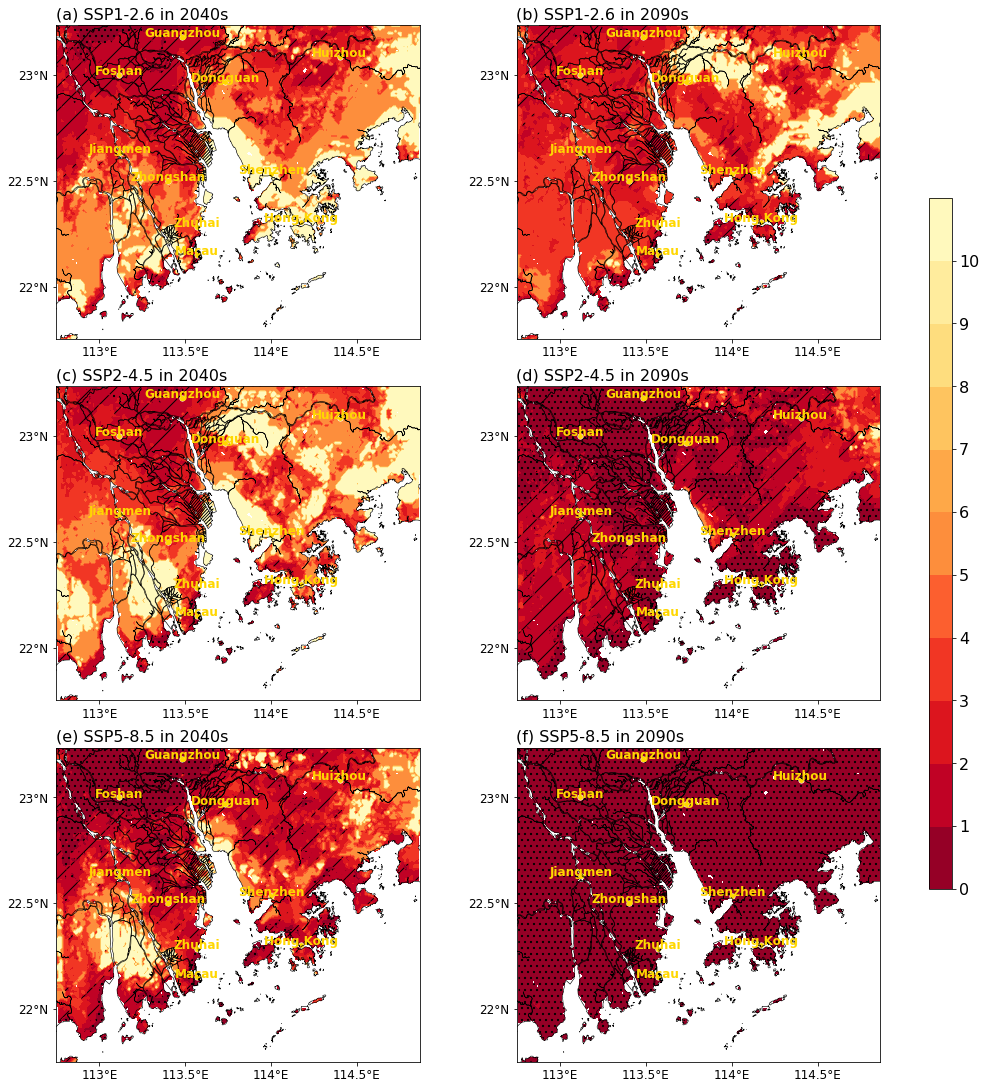

In [22]:

plt.rcParams["font.family"] = "DejaVu Sans"
font={'weight':'medium',
      'color':'black',
      'size':12}


fig,ax=plt.subplots(3,2,figsize=(16,24))
axes = ax.flatten()

ax1=axes[0]
ax2=axes[1]
ax3=axes[2]
ax4=axes[3]
ax5=axes[4]
ax6=axes[5]

ax1 = PRD.geometry.plot(ax=ax1,edgecolor='black',facecolor='none',linewidth=0.6,linestyle='solid')
ax2 = PRD.geometry.plot(ax=ax2,edgecolor='black',facecolor='none',linewidth=0.6,linestyle='solid')
ax3 = PRD.geometry.plot(ax=ax3,edgecolor='black',facecolor='none',linewidth=0.6,linestyle='solid')
ax4 = PRD.geometry.plot(ax=ax4,edgecolor='black',facecolor='none',linewidth=0.6,linestyle='solid')
ax5 = PRD.geometry.plot(ax=ax5,edgecolor='black',facecolor='none',linewidth=0.6,linestyle='solid')
ax6 = PRD.geometry.plot(ax=ax6,edgecolor='black',facecolor='none',linewidth=0.6,linestyle='solid')


C11 = ax1.contourf(ds_ssp126_2040s.XLONG,ds_ssp126_2040s.XLAT,ds_ssp126_2040s.ssp126_2040s_ry,np.arange(0, 12, 1),\
                   cmap="YlOrRd_r")
C111 = ax1.contourf(ds_ssp126_2040s.XLONG,ds_ssp126_2040s.XLAT,ds_ssp126_2040s.ssp126_2040s_ry,[0,1],hatches=['..','x'],alpha=0)
C112 = ax1.contourf(ds_ssp126_2040s.XLONG,ds_ssp126_2040s.XLAT,ds_ssp126_2040s.ssp126_2040s_ry,[1,2],hatches=['/','x'],alpha=0)

C21 = ax2.contourf(ds_ssp126_2090s.XLONG,ds_ssp126_2090s.XLAT,ds_ssp126_2090s.ssp126_2090s_ry,np.arange(0, 12, 1),cmap="YlOrRd_r")
C211 = ax2.contourf(ds_ssp126_2090s.XLONG,ds_ssp126_2090s.XLAT,ds_ssp126_2090s.ssp126_2090s_ry,[0,1],hatches=['..','x'],alpha=0)
C212 = ax2.contourf(ds_ssp126_2090s.XLONG,ds_ssp126_2090s.XLAT,ds_ssp126_2090s.ssp126_2090s_ry,[1,2],hatches=['/','x'],alpha=0)

C31 = ax3.contourf(ds_ssp245_2040s.XLONG,ds_ssp245_2040s.XLAT,ds_ssp245_2040s.ssp245_2040s_ry,np.arange(0, 12, 1),cmap="YlOrRd_r")
C311 = ax3.contourf(ds_ssp245_2040s.XLONG,ds_ssp245_2040s.XLAT,ds_ssp245_2040s.ssp245_2040s_ry,[0,1],hatches=['..','x'],alpha=0)
C312 = ax3.contourf(ds_ssp245_2040s.XLONG,ds_ssp245_2040s.XLAT,ds_ssp245_2040s.ssp245_2040s_ry,[1,2],hatches=['/','x'],alpha=0)

C41 = ax4.contourf(ds_ssp245_2090s.XLONG,ds_ssp245_2090s.XLAT,ds_ssp245_2090s.ssp245_2090s_ry,np.arange(0, 12, 1),cmap="YlOrRd_r")
C411 = ax4.contourf(ds_ssp245_2090s.XLONG,ds_ssp245_2090s.XLAT,ds_ssp245_2090s.ssp245_2090s_ry,[0,1],hatches=['..','x'],alpha=0)
C412 = ax4.contourf(ds_ssp245_2090s.XLONG,ds_ssp245_2090s.XLAT,ds_ssp245_2090s.ssp245_2090s_ry,[1,2],hatches=['/','x'],alpha=0)

C51 = ax5.contourf(ds_ssp585_2040s.XLONG,ds_ssp585_2040s.XLAT,ds_ssp585_2040s.ssp585_2040s_ry,np.arange(0, 12, 1),cmap="YlOrRd_r")
C511 = ax5.contourf(ds_ssp585_2040s.XLONG,ds_ssp585_2040s.XLAT,ds_ssp585_2040s.ssp585_2040s_ry,[0,1],hatches=['..','x'],alpha=0)
C512 = ax5.contourf(ds_ssp585_2040s.XLONG,ds_ssp585_2040s.XLAT,ds_ssp585_2040s.ssp585_2040s_ry,[1,2],hatches=['/','x'],alpha=0)

C61 = ax6.contourf(ds_ssp585_2090s.XLONG,ds_ssp585_2090s.XLAT,ds_ssp585_2090s.ssp585_2090s_ry,np.arange(0, 12, 1),cmap="YlOrRd_r")
C611 = ax6.contourf(ds_ssp585_2090s.XLONG,ds_ssp585_2090s.XLAT,ds_ssp585_2090s.ssp585_2090s_ry,[0,1],hatches=['..','x'],alpha=0)
C612 = ax6.contourf(ds_ssp585_2090s.XLONG,ds_ssp585_2090s.XLAT,ds_ssp585_2090s.ssp585_2090s_ry,[1,2],hatches=['/','x'],alpha=0)

###############################################################marker
obs_gd = pd.read_csv('/home/zzuoaa/evaluation_CMIP6/May/city_name.csv')

station_name = obs_gd.city

sc1 = ax1.scatter(obs_gd.lon,obs_gd.lat, s=30, c='gold',\
                  edgecolors='white',linewidths=0.6)
sc2 = ax2.scatter(obs_gd.lon,obs_gd.lat, s=30, c='gold',\
                  edgecolors='white',linewidths=0.6)
sc3 = ax3.scatter(obs_gd.lon,obs_gd.lat, s=30, c='gold',\
                  edgecolors='white',linewidths=0.6)
sc4 = ax4.scatter(obs_gd.lon,obs_gd.lat, s=30, c='gold',\
                  edgecolors='white',linewidths=0.6)
sc5 = ax5.scatter(obs_gd.lon,obs_gd.lat, s=30, c='gold',\
                  edgecolors='white',linewidths=0.6)
sc6 = ax6.scatter(obs_gd.lon,obs_gd.lat, s=30, c='gold',\
                  edgecolors='white',linewidths=0.6)



for i in range(len(obs_gd.lon)):
    ax1.annotate(station_name[i],xy=(obs_gd.lon[i],obs_gd.lat[i]),xytext=(obs_gd.lon[i],obs_gd.lat[i]),size=12,color='gold',\
                 ha='center',weight='bold')
    ax2.annotate(station_name[i],xy=(obs_gd.lon[i],obs_gd.lat[i]),xytext=(obs_gd.lon[i],obs_gd.lat[i]),size=12,color='gold',ha='center',weight='bold')
    ax3.annotate(station_name[i],xy=(obs_gd.lon[i],obs_gd.lat[i]),xytext=(obs_gd.lon[i],obs_gd.lat[i]),size=12,color='gold',ha='center',weight='bold')
    ax4.annotate(station_name[i],xy=(obs_gd.lon[i],obs_gd.lat[i]),xytext=(obs_gd.lon[i],obs_gd.lat[i]),size=12,color='gold',ha='center',weight='bold')
    ax5.annotate(station_name[i],xy=(obs_gd.lon[i],obs_gd.lat[i]),xytext=(obs_gd.lon[i],obs_gd.lat[i]),size=12,color='gold',ha='center',weight='bold')
    ax6.annotate(station_name[i],xy=(obs_gd.lon[i],obs_gd.lat[i]),xytext=(obs_gd.lon[i],obs_gd.lat[i]),size=12,color='gold',ha='center',weight='bold')
###############################################################marker

fig.subplots_adjust(left=0.1,
                    bottom=0.2, 
                    right=0.9, 
                    top=0.8, 
                    wspace=0, 
                    hspace=0.15)


position = fig.add_axes([0.90, 0.3, 0.02, 0.4])
cb = fig.colorbar(C11, cax=position,fraction=0.05)
cb.set_label('',fontdict=font)
cb.set_ticks([0,1,2,3,4,5,6,7,8,9,10])
cb.ax.tick_params(labelsize=16) 



ax1.set_xlim([112.74554443, 114.86462402])
ax1.set_ylim([21.75164032, 23.23461723])
ax1.set_xticks([113,113.5,114,114.5])
ax1.set_yticks([22,22.5,23])
ax1.set_xticklabels([113,113.5,114,114.5], fontdict=font) 
ax1.set_yticklabels([22,22.5,23], fontdict=font)
ax1.xaxis.set_major_formatter(LongitudeFormatter())                    
ax1.yaxis.set_major_formatter(LatitudeFormatter())                       

ax2.set_xlim([112.74554443, 114.86462402])
ax2.set_ylim([21.75164032, 23.23461723])
ax2.set_xticks([113,113.5,114,114.5])
ax2.set_yticks([22,22.5,23])
ax2.set_xticklabels([113,113.5,114,114.5], fontdict=font) 
ax2.set_yticklabels([22,22.5,23], fontdict=font)
ax2.xaxis.set_major_formatter(LongitudeFormatter())                      
ax2.yaxis.set_major_formatter(LatitudeFormatter())   

ax3.set_xlim([112.74554443, 114.86462402])
ax3.set_ylim([21.75164032, 23.23461723])
ax3.set_xticks([113,113.5,114,114.5])
ax3.set_yticks([22,22.5,23])
ax3.set_xticklabels([113,113.5,114,114.5], fontdict=font) 
ax3.set_yticklabels([22,22.5,23], fontdict=font)
ax3.xaxis.set_major_formatter(LongitudeFormatter())                    
ax3.yaxis.set_major_formatter(LatitudeFormatter())   

ax4.set_xlim([112.74554443, 114.86462402])
ax4.set_ylim([21.75164032, 23.23461723])
ax4.set_xticks([113,113.5,114,114.5])
ax4.set_yticks([22,22.5,23])
ax4.set_xticklabels([113,113.5,114,114.5], fontdict=font) 
ax4.set_yticklabels([22,22.5,23], fontdict=font)
ax4.xaxis.set_major_formatter(LongitudeFormatter())                    
ax4.yaxis.set_major_formatter(LatitudeFormatter()) 

ax5.set_xlim([112.74554443, 114.86462402])
ax5.set_ylim([21.75164032, 23.23461723])
ax5.set_xticks([113,113.5,114,114.5])
ax5.set_yticks([22,22.5,23])
ax5.set_xticklabels([113,113.5,114,114.5], fontdict=font) 
ax5.set_yticklabels([22,22.5,23], fontdict=font)
ax5.xaxis.set_major_formatter(LongitudeFormatter())                    
ax5.yaxis.set_major_formatter(LatitudeFormatter()) 

ax6.set_xlim([112.74554443, 114.86462402])
ax6.set_ylim([21.75164032, 23.23461723])
ax6.set_xticks([113,113.5,114,114.5])
ax6.set_yticks([22,22.5,23])
ax6.set_xticklabels([113,113.5,114,114.5], fontdict=font) 
ax6.set_yticklabels([22,22.5,23], fontdict=font)
ax6.xaxis.set_major_formatter(LongitudeFormatter())               
ax6.yaxis.set_major_formatter(LatitudeFormatter()) 


plt.rcParams['savefig.dpi'] = 300 
plt.rcParams['figure.dpi'] = 300 


ax1.set_title('(a) SSP1-2.6 in 2040s', fontsize=16, color='black',loc='left')
ax2.set_title('(b) SSP1-2.6 in 2090s', fontsize=16, color='black',loc='left')
ax3.set_title('(c) SSP2-4.5 in 2040s', fontsize=16, color='black',loc='left')
ax4.set_title('(d) SSP2-4.5 in 2090s', fontsize=16, color='black',loc='left')
ax5.set_title('(e) SSP5-8.5 in 2040s', fontsize=16, color='black',loc='left')
ax6.set_title('(f) SSP5-8.5 in 2090s', fontsize=16, color='black',loc='left')


plt.show()
fig.savefig('/disk/r110/zzuoaa/hot_extreme/plots_era5_correction_1120/script/return_period/after_bias_correction/pics/fig11_hatches_compare.pdf',bbox_inches='tight',dpi=300)
fig.savefig('/disk/r110/zzuoaa/hot_extreme/plots_era5_correction_1120/script/return_period/after_bias_correction/pics/fig11_hatches_compare.png',bbox_inches='tight',dpi=300)
fig.savefig('/disk/r110/zzuoaa/hot_extreme/plots_era5_correction_1120/script/return_period/after_bias_correction/pics/fig11_hatches_compare.eps',bbox_inches='tight',dpi=300,format='eps')